In [1]:
import numpy as np
import gc
import os
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
basepath = '/data/user-data/ksand/R3/fitburst_run_pol_DM/'
entries = os.listdir(basepath)
#entries.remove('.ipynb_checkpoints')
entries = np.array(entries)
print(entries)
print(entries.shape)

['73726599' '203798724' '71785167' '195132396' '92844954' '60073678'
 '166812476' '71665813' '83984528' '180666196' '175929272' '23789294'
 '67522832' '151677988' '171855709' '154913824' '69509443' '180667327'
 '153859596' '23891929' '176060009' '194488374' '92773515' '194488454'
 '71784833' '65395717' '171681248' '40750224' '154910364' '40363753'
 '200973875' '71784400' '194488393' '163534005' '163362088' '84081108'
 '155079679' '67522901' '163181014' '203935225' '188553320']
(41,)


In [3]:
basepath = '/data/user-data/ksand/R3/fitburst_run_pol_DM/'
event_ids = []
pm_files = []
result_files = []
input_files = []
summary = []
for event in entries:
    if (event != '.ipynb_checkpoints'):        
        path_to_event = os.path.join(basepath, event)
        trials = np.array(os.listdir(path_to_event))
    
        print(event, len(trials))
        count = 0


        for trial in trials:
            if (trial != '.ipynb_checkpoints'):
                path_to_file = os.path.join(path_to_event, trial)
                #print(path_to_file)
                event_ids.append(event)
                np.array(pm_files.append(glob.glob(path_to_file + '/pm*.npz')))
                #print(pm_files)
                np.array(result_files.append(glob.glob(path_to_file + '/result*.npz')))
                np.array(input_files.append(glob.glob(path_to_file + '/R3*.npz')))
                np.array(summary.append(glob.glob(path_to_file + '/summary*.png')))
                count = count + 1
print(event_ids)

73726599 1
203798724 1
71785167 1
195132396 1
92844954 1
60073678 1
166812476 2
71665813 1
83984528 1
180666196 1
175929272 1
23789294 1
67522832 1
151677988 1
171855709 1
154913824 1
69509443 1
180667327 1
153859596 1
23891929 1
176060009 2
194488374 1
92773515 1
194488454 1
71784833 1
65395717 1
171681248 1
40750224 1
154910364 1
40363753 1
200973875 3
71784400 1
194488393 1
163534005 1
163362088 1
84081108 1
155079679 1
67522901 1
163181014 1
203935225 1
188553320 1
['73726599', '203798724', '71785167', '195132396', '92844954', '60073678', '166812476', '71665813', '83984528', '180666196', '175929272', '23789294', '67522832', '151677988', '171855709', '154913824', '69509443', '180667327', '153859596', '23891929', '176060009', '194488374', '92773515', '194488454', '71784833', '65395717', '171681248', '40750224', '154910364', '40363753', '200973875', '200973875', '71784400', '194488393', '163534005', '163362088', '84081108', '155079679', '67522901', '163181014', '203935225', '188553320

In [5]:
centers = []
peaks = []
uppers = []
lowers = []
bws = []
for result_file in result_files:
    #print(result_file)
    if len(result_file) > 0:
        data_result = np.load(result_file[0], allow_pickle = True)
        try:
            model = data_result['arr_0'][2] ##load the fitburst model
        except:
            model = data_result['arr_0'][1]
        y = np.sum(model, axis=1)
        y_lim = np.max(y)/10
        freq = np.linspace(400,800,1024)
        low = np.min(np.where(y>y_lim))
        #print(freq[low])
        lowers.append(freq[low])
        high = np.max(np.where(y>y_lim))
        #print(freq[high])
        uppers.append(freq[high])
        center = (freq[low] + freq[high])/2
        centers.append(center)
        bw = freq[high]-freq[low]
        #print(center, bw)
        bws.append(bw)
        peak = np.argmax(y)
        #print(freq[peak])
        peaks.append(freq[peak])
        
        
#         plt.imshow(model, origin='lower')
#         plt.show()
        
#         plt.plot(freq,y)
#         plt.axvline(freq[low], color = 'r')
#         plt.axvline(freq[high], color = 'b')
#         plt.axvline(freq[peak], color = 'g')
#         plt.axvline(center, color = 'k')
#         plt.show()
#         gc.collect()
print(peaks, "\n")
print(bws, "\n")
print(uppers, "\n")
print(lowers, "\n")
print(centers)

('arr_0', array([{'dm': [0.9139973318032555], 'scattering_timescale': [0.0005445876732825848], 'amplitude': array([-3.95844643]), 'arrival_time': array([0.01461754]), 'burst_width': array([0.00445039]), 'spectral_index': array([37.48579032]), 'spectral_running': array([-80.37272734])},
       {'dm': [0.01056797552279626], 'scattering_timescale': [2.8583324174365087e-06], 'amplitude': array([0.11005729]), 'arrival_time': array([9.26354324e-05]), 'burst_width': array([1.20307222e-05]), 'spectral_index': array([2.23915656]), 'spectral_running': array([4.8079496])}],
      dtype=object))
('arr_0', array([{'dm': [0.6742548369207753], 'scattering_timescale': [0.0008712638476957361], 'amplitude': array([-3.51162766]), 'arrival_time': array([0.01579086]), 'burst_width': array([0.0044133]), 'spectral_index': array([1.485364]), 'spectral_running': array([19.14846147])},
       {'dm': [0.09207583272835798], 'scattering_timescale': [8.575861444539986e-05], 'amplitude': array([0.12100814]), 'arriva

('arr_0', array([{'dm': [1.491809436620067], 'scattering_timescale': [-148.2157276177868], 'amplitude': array([-3.46366387]), 'arrival_time': array([0.0168376]), 'burst_width': array([0.00279721]), 'spectral_index': array([21.99362182]), 'spectral_running': array([-55.71322586])}],
      dtype=object))
('arr_0', array([{'dm': [1.486954167039672], 'scattering_timescale': [-0.0027373713648160694], 'amplitude': array([-0.42107552, -3.34592807]), 'arrival_time': array([-4.26001689,  0.01686526]), 'burst_width': array([-1.52790862e+01,  3.02253798e-03]), 'spectral_index': array([ 5.9700915 , 19.94990845]), 'spectral_running': array([-13.74972241, -50.08177504])}],
      dtype=object))
('arr_0', array([{'dm': [0.7993613365596052], 'scattering_timescale': [0.003127825907769791], 'amplitude': array([-8.85917923]), 'arrival_time': array([0.00556877]), 'burst_width': array([0.00374494]), 'spectral_index': array([89.34137398]), 'spectral_running': array([-121.39379244])},
       {'dm': [0.1691295

13719

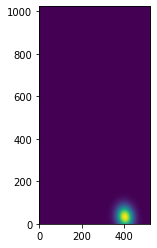

[400.         400.39100684 400.78201369 ... 799.21798631 799.60899316
 800.        ]
412.9032258064516
0
136
426.58846529814275 53.176930596285445


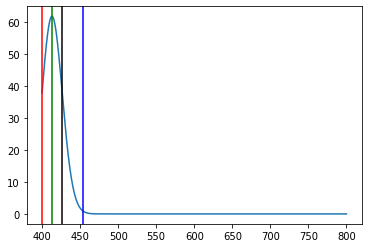

In [56]:
file = '/data/user-data/ksand/R3/fitburst_run_spectrum/195132396/Trial1_20220626/result_onlyfit)R3_195132396_DM_348.94_dsamp_64.npz'
data_result = np.load(file, allow_pickle = True)
model = data_result['arr_0'][1]
plt.imshow(model, origin='lower')
plt.show()
x = np.arange(0,model.shape[0])
y = np.sum(model, axis=1)
freq = np.linspace(400,800,1024)
print(freq)

peak = np.argmax(y)
print(freq[peak])
low = np.min(np.where(y>1)) ## The threshold can change
print(low)
high = np.max(np.where(y>1))
print(high)
center = (freq[low] + freq[high])/2
bw = freq[high]-freq[low]

print(center, bw)

plt.plot(freq,y)
plt.axvline(freq[low], color = 'r')
plt.axvline(freq[high], color = 'b')
plt.axvline(freq[peak], color = 'g')
plt.axvline(center, color = 'k')
plt.show()

In [52]:
peak = np.argmax(y)
print(freq[peak])
low = np.min(np.where(y>1))
print(low)
high = np.max(np.where(y>1))
print(high)
center = (freq[low] + freq[high])/2
bw = freq[high]-freq[low]

print(center, bw)

474.68230694037146
0
463
490.51808406647115 181.0361681329423
